In [3]:
import numpy as np
import os
import sys
import tensorflow as tf
import label_map_util
import cv2
from matplotlib import pyplot as plt
import time
%matplotlib inline

MODELS = ['ssd_mobilenet_v1_coco_11_06_2017', 'ssd_inception_v2_coco_11_06_2017',\
                  'rfcn_resnet101_coco_11_06_2017', 'faster_rcnn_resnet101_coco_11_06_2017',\
                   'faster_rcnn_inception_resnet_v2_atrous_coco_11_06_2017']




NUM_CLASSES = 90
PATH_TO_LABELS = "/root/object_detection/data/mscoco_label_map.pbtxt"
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)


#Get the session from the specified model
def load_model(model, dynamic_memory=True):
    
    #Dynamically allocating memory
    config = tf.ConfigProto()
    config.gpu_options.allow_growth=dynamic_memory
    sess = tf.Session(config=config)    
    PATH_TO_CKPT = os.path.join("/root/object_detection", model , 'frozen_inference_graph.pb')
    detection_graph = tf.Graph()
    with detection_graph.as_default():
        od_graph_def = tf.GraphDef()
        with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
            serialized_graph = fid.read()
            od_graph_def.ParseFromString(serialized_graph)
            tf.import_graph_def(od_graph_def, name='')
            
    return tf.Session(graph=detection_graph, config=config)

def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)


def translate_result(boxes, scores, classes, num_detections, im_width, im_height, thresh):
    #Normalizing the detection result
    boxes = np.squeeze(boxes)
    scores = np.squeeze(scores)
    classes = np.squeeze(classes)    
    
    thresh_mask = scores > thresh
    
    scores = scores[thresh_mask]
    boxes = boxes[thresh_mask]
    classes = classes[thresh_mask]
    
    outputs = []        
    for i, score in enumerate(scores):      
        #Stop when score is lower than threshold since the score is sorted
        #!!!!Performance of this line can be improved!!!！
       

        class_name = category_index[classes[i]]['name']
        ymin, xmin, ymax, xmax = boxes[i]
        left, right, top, bottom = (xmin * im_width, xmax * im_width,\
                                  ymin * im_height, ymax * im_height)          
        #Allocating result into ouput dict
        output = {}        
        output['score'] = score
        output['class'] = class_name
        output['x'] = left
        output['y'] = top
        output['width'] = right-left
        output['height'] = bottom-top
        #Append each detection into a list
        outputs.append(output)
    return outputs


def detect(sess, img_path, thresh=0.7):
    #img = Image.open(img_path)
    #
    #img_np = load_image_into_numpy_array(img)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)    
    img_height, img_width, _ = img.shape
    img_np_expanded = np.expand_dims(img, axis=0)
    
    #Initalization of output and input tensors for session
    img_tensor = sess.graph.get_tensor_by_name('image_tensor:0')
    boxes = sess.graph.get_tensor_by_name('detection_boxes:0')
    scores = sess.graph.get_tensor_by_name('detection_scores:0')
    classes = sess.graph.get_tensor_by_name('detection_classes:0')
    num_detections = sess.graph.get_tensor_by_name('num_detections:0')
    
    outputs = [boxes, scores, classes, num_detections]
    feed_dict = {img_tensor: img_np_expanded}
    boxes, scores, classes, num_detections = sess.run(outputs,feed_dict=feed_dict) 
 
    return translate_result(boxes, scores, classes, num_detections, img_width,\
                            img_height,thresh)


def




def viz_detections(img_path, outputs):
    """Draw detected bounding boxes."""
    im = cv2.imread(img_path)
    im = im[:, :, (2, 1, 0)]
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow(im, aspect='equal')
    
    for output in outputs:
        score = output['score'] 
        class_name = output['class']
        x = output['x']
        y = output['y']
        width = output['width']
        height = output['height']   
      

        ax.add_patch(
            plt.Rectangle((x, y),
                          width,
                          height, fill=False,
                          edgecolor='red', linewidth=3.5)
            )
        ax.text(x, y - 2,
                '{:s} {:.3f}'.format(class_name, score),
                bbox=dict(facecolor='blue', alpha=0.5),
                fontsize=14, color='white')


    plt.axis('off')
    plt.tight_layout()
    plt.draw()

    


Total: 5.62 seconds
Total: 5.62 seconds
Total: 5.62 seconds
Total: 5.62 seconds
Total: 5.62 seconds
Total: 5.62 seconds
Total: 1.30 seconds
Total: 1.30 seconds
Total: 1.30 seconds
Total: 1.30 seconds
Total: 1.30 seconds
Total: 1.30 seconds
Total: 1.30 seconds
Total: 1.30 seconds
Total: 1.30 seconds
Total: 1.30 seconds
Total: 1.30 seconds
Total: 1.30 seconds
Total: 1.30 seconds
Total: 1.30 seconds
Total: 1.30 seconds
Total: 1.30 seconds
Total: 1.30 seconds
Total: 1.41 seconds
Total: 1.41 seconds
Total: 1.41 seconds
Total: 1.41 seconds
Total: 1.41 seconds
Total: 1.41 seconds
Total: 1.41 seconds
Total: 1.41 seconds
Total: 1.41 seconds
Total: 1.41 seconds
Total: 1.41 seconds
Total: 1.17 seconds
Total: 1.17 seconds
Total: 1.17 seconds
Total: 1.17 seconds
Total: 1.17 seconds
Total: 1.17 seconds
Total: 1.41 seconds
Total: 1.41 seconds
Total: 1.41 seconds
Total: 1.41 seconds
Total: 1.41 seconds
Total: 1.41 seconds
Total: 1.41 seconds
Total: 1.41 seconds
Total: 1.41 seconds
Total: 1.41 seconds


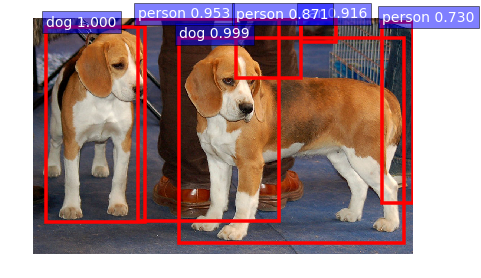

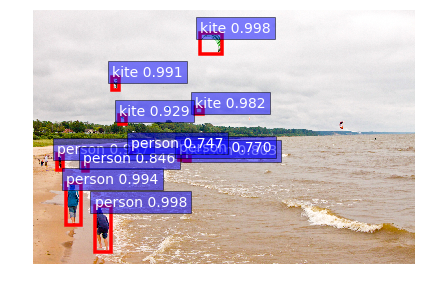

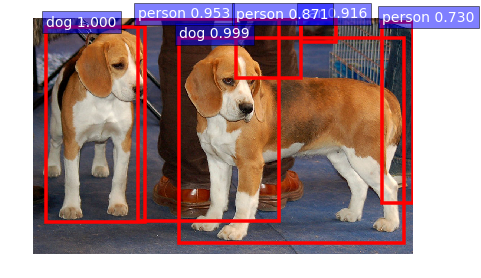

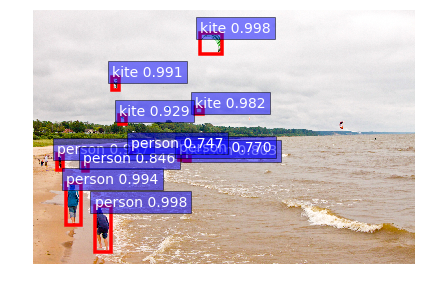

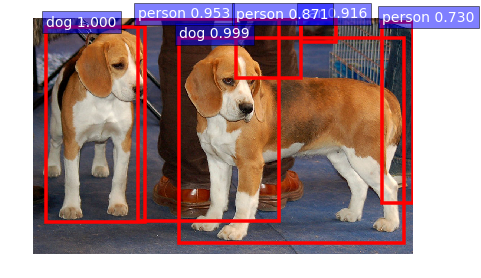

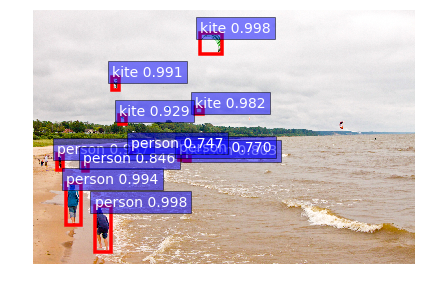

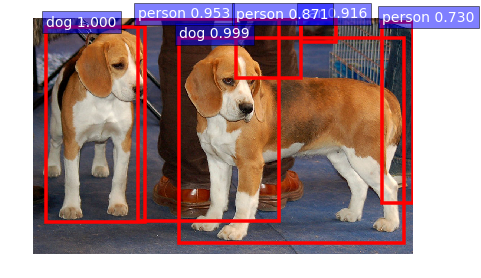

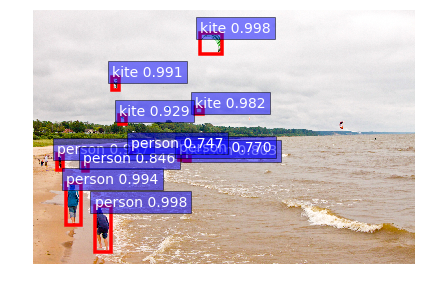

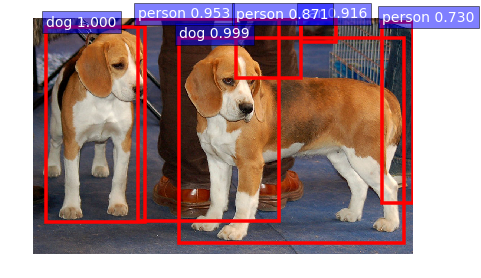

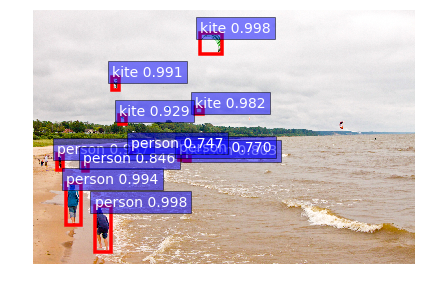

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


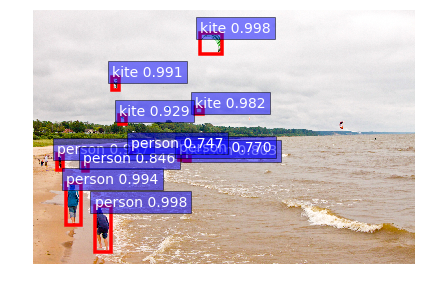

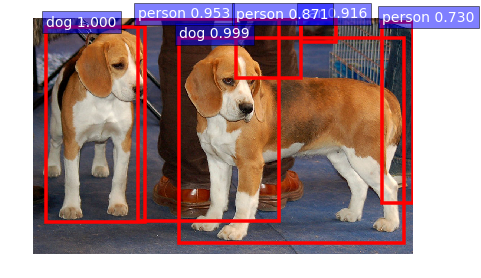

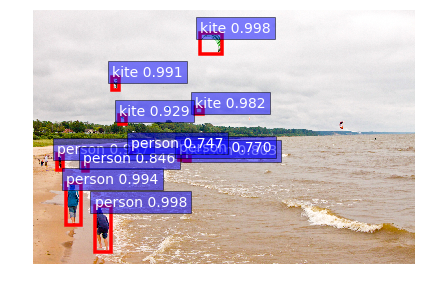

In [4]:

TEST_IMAGE_PATHS = [os.path.join("/root/object_detection/test_images",\
                                 'image{}.jpg'.format(i)) for i in range(1,3)]
THRESHOLD = 0.7
model = MODELS[4]
sess = load_model(model)
for img_path in TEST_IMAGE_PATHS*10:
    tic = time.time()
    result = detect(sess, img_path, thresh=THRESHOLD)
    outputs = result
    toc = time.time()
    for output in outputs:                     
        score = output['score'] 
        class_name = output['class']
        x = output['x']
        y = output['y']
        width = output['width']
        height = output['height']
        print("Total: {0:.2f} seconds".format(toc-tic))

    viz_detections(img_path, outputs)

In [5]:
label_map

item {
  name: "/m/01g317"
  id: 1
  display_name: "person"
}
item {
  name: "/m/0199g"
  id: 2
  display_name: "bicycle"
}
item {
  name: "/m/0k4j"
  id: 3
  display_name: "car"
}
item {
  name: "/m/04_sv"
  id: 4
  display_name: "motorcycle"
}
item {
  name: "/m/05czz6l"
  id: 5
  display_name: "airplane"
}
item {
  name: "/m/01bjv"
  id: 6
  display_name: "bus"
}
item {
  name: "/m/07jdr"
  id: 7
  display_name: "train"
}
item {
  name: "/m/07r04"
  id: 8
  display_name: "truck"
}
item {
  name: "/m/019jd"
  id: 9
  display_name: "boat"
}
item {
  name: "/m/015qff"
  id: 10
  display_name: "traffic light"
}
item {
  name: "/m/01pns0"
  id: 11
  display_name: "fire hydrant"
}
item {
  name: "/m/02pv19"
  id: 13
  display_name: "stop sign"
}
item {
  name: "/m/015qbp"
  id: 14
  display_name: "parking meter"
}
item {
  name: "/m/0cvnqh"
  id: 15
  display_name: "bench"
}
item {
  name: "/m/015p6"
  id: 16
  display_name: "bird"
}
item {
  name: "/m/01yrx"
  id: 17
  display_name: "cat

In [7]:
import json

In [8]:
!cat data/mscoco_label_map.pbtxt

item {
  name: "/m/01g317"
  id: 1
  display_name: "person"
}
item {
  name: "/m/0199g"
  id: 2
  display_name: "bicycle"
}
item {
  name: "/m/0k4j"
  id: 3
  display_name: "car"
}
item {
  name: "/m/04_sv"
  id: 4
  display_name: "motorcycle"
}
item {
  name: "/m/05czz6l"
  id: 5
  display_name: "airplane"
}
item {
  name: "/m/01bjv"
  id: 6
  display_name: "bus"
}
item {
  name: "/m/07jdr"
  id: 7
  display_name: "train"
}
item {
  name: "/m/07r04"
  id: 8
  display_name: "truck"
}
item {
  name: "/m/019jd"
  id: 9
  display_name: "boat"
}
item {
  name: "/m/015qff"
  id: 10
  display_name: "traffic light"
}
item {
  name: "/m/01pns0"
  id: 11
  display_name: "fire hydrant"
}
item {
  name: "/m/02pv19"
  id: 13
  display_name: "stop sign"
}
item {
  name: "/m/015qbp"
  id: 14
  display_name: "parking meter"
}
item {
  name: "/m/0cvnqh"
  id: 15
  display_name: "bench"
}
item {
  name: "/m/015p6"
  id: 16
  display_name: "bird"
}
item {
  name: "/m/01yrx"
  id: 17
  display_name: "cat